## 1. Problem framing

### What is churn in this business context?
Customer churn refers to customers who stop using the company’s service
or terminate their subscription within a given time period.

In this dataset, a customer is considered churned if the Churn variable equals 1,
indicating the customer has left the service.

### Why is churn important to measure and reduce?
Customer acquisition is significantly more expensive than customer retention.
High churn directly impacts revenue, profitability, and long-term growth.

By identifying customers at risk of churn, the business can:
- Proactively engage customers
- Reduce revenue loss
- Improve customer lifetime value (CLV)

In [3]:
import pandas as pd
import numpy as np

# load data
df = pd.read_csv('telco-customer-churn2.csv')
#inspect data
print(df.shape)
print(df.info())
print(df.head())
print(df['Churn'].value_counts(normalize=True))
df.head()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') #convert dtypes to float

df['TotalCharges'] = df['TotalCharges'].replace([' ', 'No phone service', ''], np.nan)

print(df.isnull().sum()) #check all colums for missing values

#handle missing values
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
#validate target
df['Churn'] = df['Churn'].map({"Yes":1, "No":0}) #1=churn.0=stay




In [9]:
#quick check
print(df.isnull().sum().sum())

print(df.dtypes)

0
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [10]:
df.head(40)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [11]:
print(df['Churn'].value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [12]:
df.to_csv("Cleaned_telco_churn.csv", index=False)

In [14]:
#overall churn rate
churn_rate = df['Churn'].mean() * 100
print(f"churn_rate: {churn_rate:.2f}%")

churn_rate: 26.54%


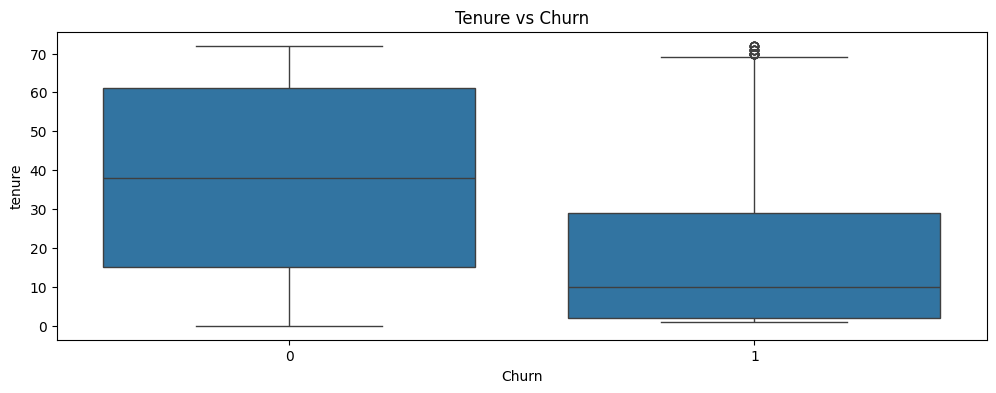

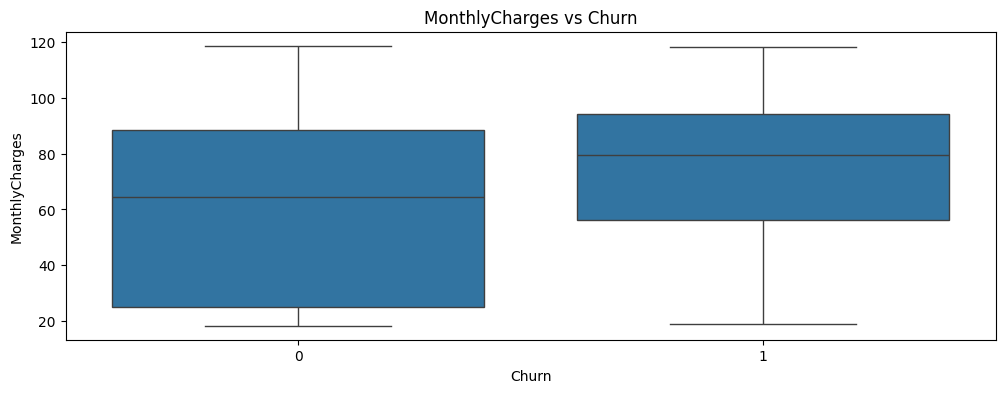

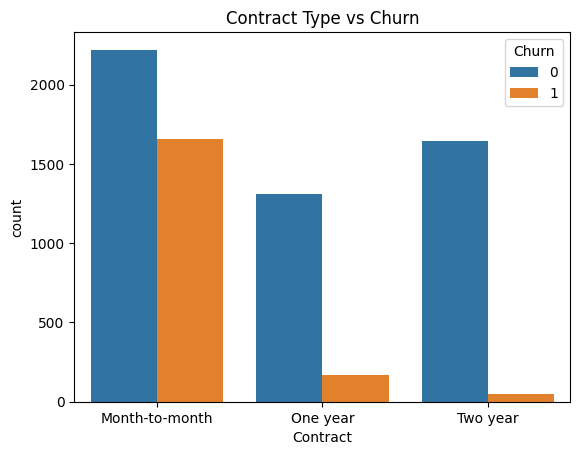

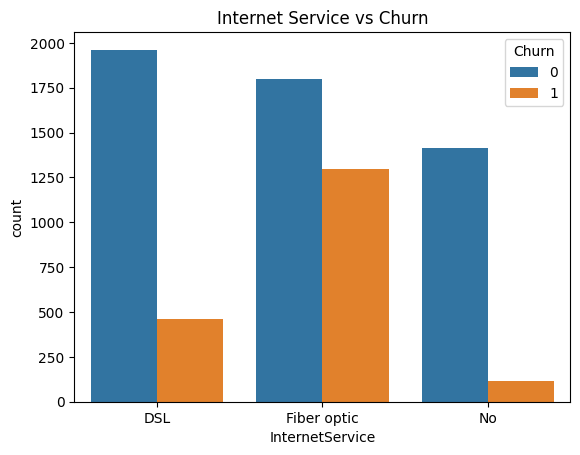

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Key plots – do these 4–5 only
plt.figure(figsize=(12,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("MonthlyCharges vs Churn")
plt.show()

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()

In [15]:
print(df.groupby('InternetService')['Churn'].mean())

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64


In [ ]:
print(df.groupby('InternetService')['Churn'].mean())

### Feature enginneering

In [19]:
#Tenure groups(buckets for non linear effects)
df['TenureGroup'] = pd.cut(df['tenure'],
                            bins=[0,12,24,48,60, np.inf], labels=['0-1yr', '1-2yr', '2-4yr', '4-5yr', '5+yr'])

In [20]:
#count services
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['NumServices'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

### encoding

In [21]:

#one-hot encoding for multi-category
df = pd.get_dummies(df, columns=['gender','SeniorCitizen','Partner','Dependents',
                                 'PhoneService','MultipleLines','InternetService',
                                 'OnlineSecurity','OnlineBackup','DeviceProtection',
                                 'TechSupport','StreamingTV','StreamingMovies',
                                 'Contract','PaperlessBilling','PaymentMethod',
                                 'TenureGroup'], drop_first=True)

### split data into trainning and test sets

In [26]:
from sklearn.model_selection import train_test_split

x = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)



### Training

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve,classification_report
import matplotlib.pyplot as plt
#logistic regression
lr = LogisticRegression(max_iter=1000,
    random_state=42,class_weight='balanced')
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_prob_lr = lr.predict_proba(x_test)[:, 1]


print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROA_AUC:", round(roc_auc_score(y_test, y_prob_lr), 4))

#Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=10, random_state=42)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
prob_rf = rf.predict_proba(x_test)[:, 1]

print("n\Random Forest")
print(classification_report(y_test, pred_rf))
print("ROC_AUC:", round(roc_auc_score(y_test,prob_rf), 4))


<>:23: SyntaxWarning: invalid escape sequence '\R'
<>:23: SyntaxWarning: invalid escape sequence '\R'
C:\Users\User\AppData\Local\Temp\ipykernel_4012\1998425366.py:23: SyntaxWarning: invalid escape sequence '\R'
  print("n\Random Forest")
C:\Users\User\DSprojects\churn_prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROA_AUC: 0.8425
n\Random Forest
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

ROC_AUC: 0.8412


In [48]:
import joblib
joblib.dump(rf, 'churn_model_rf.pkl')

['churn_model_rf.pkl']